In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [56]:
def group_bar_plot(group_list, x_tick, legend, title, y_label):
    assert(len(x_tick) == len(group_list))
    x = np.arange(len(x_tick))  # the label locations
    width = 1.0/(len(legend)+2)
    multiplier = 0
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(figsize=(16, 10))
    ax = plt.gca()

    for i in range(len(legend)):
        data = group_list[:, i]
        offset = width * multiplier
        rects = ax.bar(x + offset, data, width, label=legend[i])
#         ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    ax.set_xticks(x + 0.5)
    ax.set_xticklabels(x_tick, rotation = 45)
    ax.legend(loc="upper left", bbox_to_anchor=(1.05, 0.9))
    ax.set_yscale('log')
    plt.show()

In [66]:
legend=["0", "1", "2", "3", "-1", "-2", "-21", "-22", "-23"]
legend_alias=["V/M: d", "V/M: d-s", "V/M: d-s-h", "V/M: d-h", 
              "V: d-s, M: s", "V: d-s, M: d-s-h", 
              "V: d-s, M: h", "V: d-s, M: s-h", "V: d, M: d-s-h"]
x_tick=["2cubes_sphere", "cage13", "cage14", "offshore", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]

In [58]:
def get_data(csv_file, group, item, idx=4):
    result = np.zeros((len(group), len(item)))
    group_idx = 0
    item_idx = 0
    with open(csv_file) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row[0] == "matrix":
                continue
            print(row)
            print(group[group_idx] + '_mixed' + item[item_idx])
            assert(row[0] == group[group_idx] + '_mixed' + item[item_idx])
            if int(row[2]) == 700:
                result[group_idx, item_idx] = np.double(row[idx])
            else:
                result[group_idx, item_idx] = np.double(row[idx])
            item_idx = (item_idx + 1) % len(item)
            if item_idx == 0:
                group_idx = (group_idx + 1) % len(group)
    return result

In [62]:
result = get_data('collect_case_10_v_cg_jacobi.csv', x_tick, legend, 4)

['2cubes_sphere_mixed0', ' 1.63168e-10', ' 23', '69.3293', '29.952', '1.30226']
2cubes_sphere_mixed0
['2cubes_sphere_mixed1', ' 1.63169e-10', ' 23', '66.5898', '29.7114', '1.2918']
2cubes_sphere_mixed1
['2cubes_sphere_mixed2', ' 1.87861e-10', ' 23', '68.919', '30.3701', '1.32044']
2cubes_sphere_mixed2
['2cubes_sphere_mixed3', ' 5.88978e-09', ' 165', '61.5609', '202.991', '1.23025']
2cubes_sphere_mixed3
['2cubes_sphere_mixed-1', ' 1.63168e-10', ' 23', '67.7794', '30.2086', '1.31342']
2cubes_sphere_mixed-1
['2cubes_sphere_mixed-2', ' 1.63171e-10', ' 23', '65.6511', '30.1658', '1.31156']
2cubes_sphere_mixed-2
['2cubes_sphere_mixed-21', ' 1.63405e-10', ' 23', '63.8381', '30.2766', '1.31638']
2cubes_sphere_mixed-21
['2cubes_sphere_mixed-22', ' 1.63168e-10', ' 23', '65.1457', '30.8348', '1.34064']
2cubes_sphere_mixed-22
['2cubes_sphere_mixed-23', ' 1.63171e-10', ' 23', '68.9355', '31.7826', '1.38185']
2cubes_sphere_mixed-23
['cage13_mixed0', ' 3.68272e-10', ' 11', '149.267', '21.6433', '1.96

In [63]:
speedup = result[:, [0]]/result
speedup = speedup * (speedup >= 1)

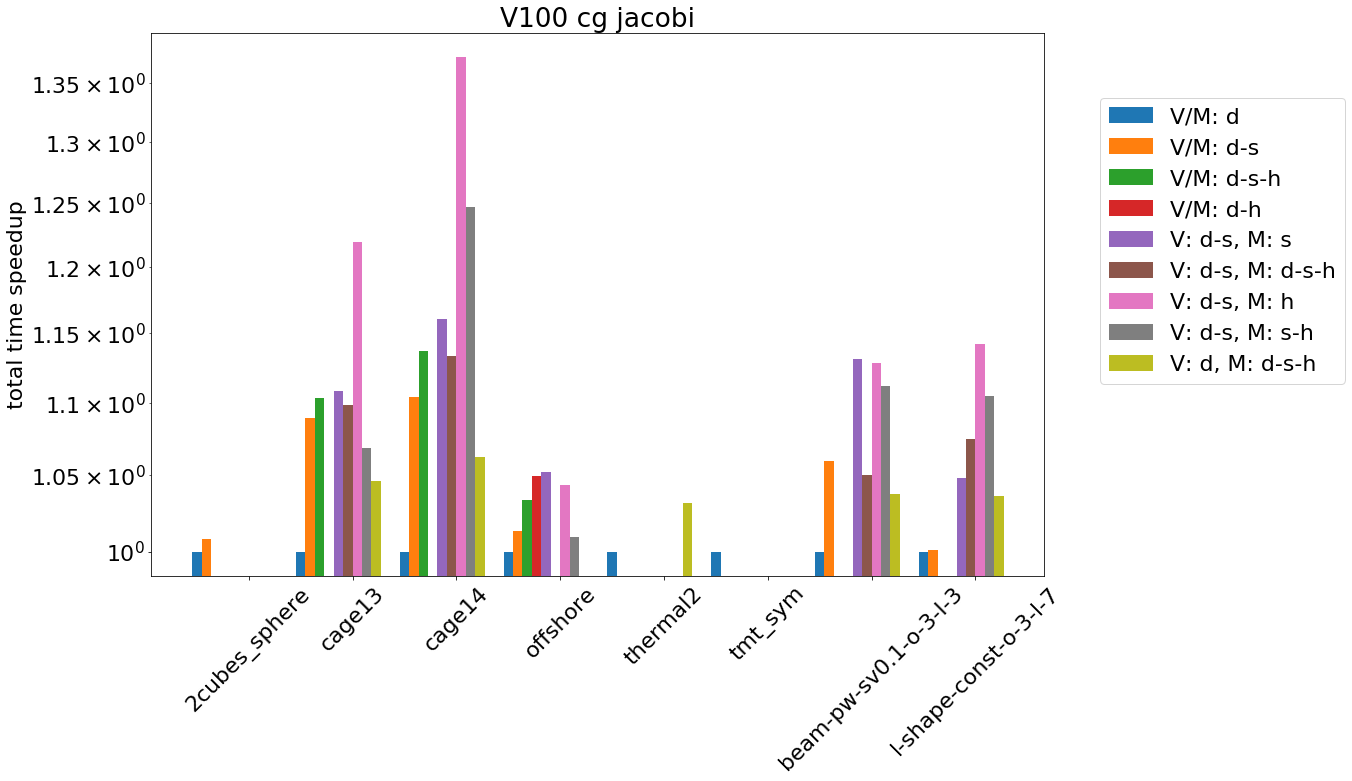

In [68]:
group_bar_plot(speedup, x_tick, legend_alias, 'V100 cg jacobi', 'total time speedup')

In [32]:
result

array([[ 29.952 ,  29.7114,  30.3701, 202.991 ,  30.2086,  30.1658,
         30.2766,  30.8348,  31.7826],
       [ 21.6433,  19.8638,  19.6201,  27.3581,  19.5329,  19.6983,
         17.7495,  20.2504,  20.6844],
       [ 51.3635,  46.5131,  45.168 ,  54.7444,  44.2488,  45.304 ,
         37.4237,  41.1803,  48.3517],
       [     nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan],
       [722.667 , 796.514 ,      nan,      nan, 765.876 , 791.547 ,
        728.856 , 746.473 , 700.33  ],
       [516.043 , 564.077 ,      nan,      nan, 548.629 , 574.889 ,
        561.774 , 566.181 , 535.49  ],
       [ 71.5094,  67.4616, 128.89  , 188.988 ,  63.217 ,  68.0662,
         63.3655,  64.3163,  68.9056],
       [285.909 , 285.567 ,      nan,      nan, 272.798 , 266.052 ,
        250.286 , 258.763 , 275.936 ]])

In [43]:
result = get_data('collect_case_10_v_cg_jacobi.csv', x_tick, legend, 2)

['2cubes_sphere_mixed0', ' 1.63168e-10', ' 23', '69.3293', '29.952', '1.30226']
2cubes_sphere_mixed0
['2cubes_sphere_mixed1', ' 1.63169e-10', ' 23', '66.5898', '29.7114', '1.2918']
2cubes_sphere_mixed1
['2cubes_sphere_mixed2', ' 1.87861e-10', ' 23', '68.919', '30.3701', '1.32044']
2cubes_sphere_mixed2
['2cubes_sphere_mixed3', ' 5.88978e-09', ' 165', '61.5609', '202.991', '1.23025']
2cubes_sphere_mixed3
['2cubes_sphere_mixed-1', ' 1.63168e-10', ' 23', '67.7794', '30.2086', '1.31342']
2cubes_sphere_mixed-1
['2cubes_sphere_mixed-2', ' 1.63171e-10', ' 23', '65.6511', '30.1658', '1.31156']
2cubes_sphere_mixed-2
['2cubes_sphere_mixed-21', ' 1.63405e-10', ' 23', '63.8381', '30.2766', '1.31638']
2cubes_sphere_mixed-21
['2cubes_sphere_mixed-22', ' 1.63168e-10', ' 23', '65.1457', '30.8348', '1.34064']
2cubes_sphere_mixed-22
['2cubes_sphere_mixed-23', ' 1.63171e-10', ' 23', '68.9355', '31.7826', '1.38185']
2cubes_sphere_mixed-23
['cage13_mixed0', ' 3.68272e-10', ' 11', '149.267', '21.6433', '1.96

In [44]:
result

array([[ 23.,  23.,  23., 165.,  23.,  23.,  23.,  23.,  23.],
       [ 11.,  11.,  11.,  15.,  11.,  11.,  11.,  11.,  11.],
       [ 10.,  10.,  10.,  13.,  10.,  10.,  10.,  10.,  10.],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [349., 424.,  nan,  nan, 426., 424., 425., 425., 349.],
       [359., 401.,  nan,  nan, 401., 400., 401., 400., 359.],
       [ 44.,  44.,  86., 127.,  44.,  44.,  44.,  44.,  44.],
       [160., 171.,  nan,  nan, 171., 160., 170., 171., 160.]])

In [65]:
speedup

array([[1.        , 1.0080979 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.08958507, 1.10311874, 0.        , 1.10804335,
        1.09873949, 1.21937519, 1.06878383, 1.04635861],
       [1.        , 1.1042803 , 1.13716569, 0.        , 1.16078854,
        1.13375199, 1.37248588, 1.24728329, 1.06228943],
       [1.        , 1.01305786, 1.03385073, 1.04989645, 1.05193884,
        0.        , 1.04327014, 1.00966294, 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.03189496],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.06000154, 0.        , 0.        , 1.13117358,
        1.05058605, 1.12852262, 1.11183946, 1.03778793],
       [1.        , 1.00119762, 0.        , 0.        , 1.0480612 ,
        1.07463579, 1.14232918, 1.10490681, 1.03614244]])